In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('hi for remote ssh')

hi for remote ssh


In [167]:
test = pd.read_csv('../input/ddareung/test.csv')
train = pd.read_csv('../input/ddareung/train.csv')

In [168]:
ntrain = len(train)
ntest = len(test)

y_train = train['count'].values
id_test = test['id']

data = pd.concat((train, test))
print(f'data size: {data.shape}')

data size: (2174, 11)


In [169]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


<AxesSubplot:>

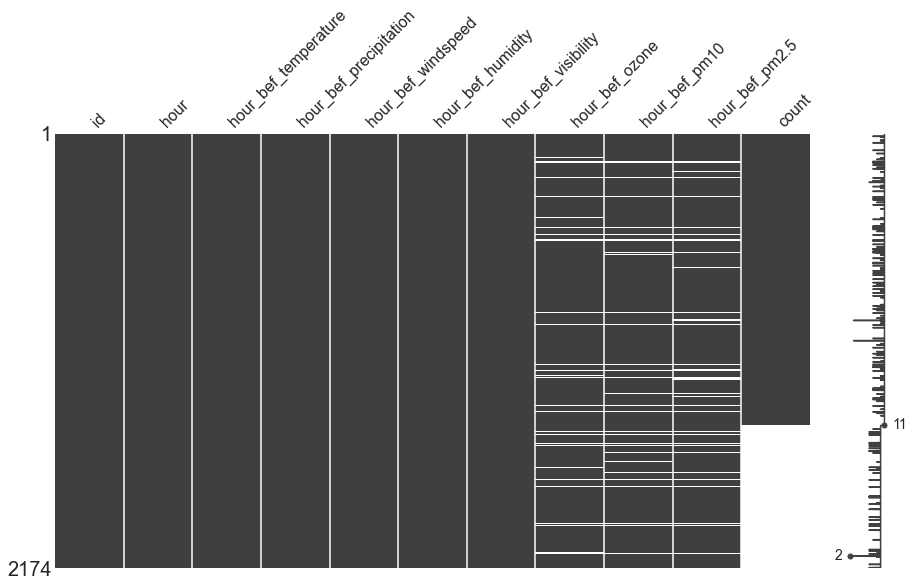

In [170]:
missingno.matrix(data, figsize=(15,8))

In [171]:
data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        3
hour_bef_precipitation      3
hour_bef_windspeed         10
hour_bef_humidity           3
hour_bef_visibility         3
hour_bef_ozone            111
hour_bef_pm10             127
hour_bef_pm2.5            153
count                     715
dtype: int64

In [172]:
data.isna().any()

id                        False
hour                      False
hour_bef_temperature       True
hour_bef_precipitation     True
hour_bef_windspeed         True
hour_bef_humidity          True
hour_bef_visibility        True
hour_bef_ozone             True
hour_bef_pm10              True
hour_bef_pm2.5             True
count                      True
dtype: bool

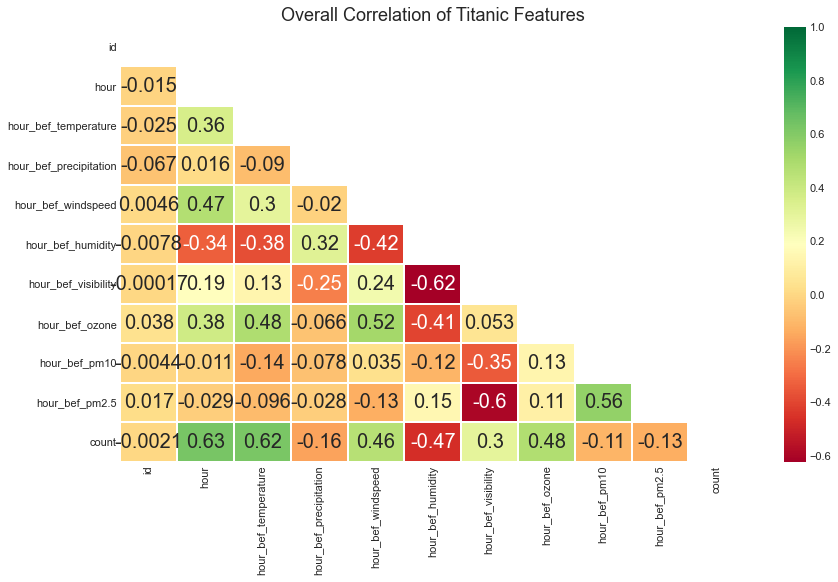

In [173]:
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,8))
plt.title('Overall Correlation of Titanic Features', fontsize=18)
sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

## Fill blank cells

In [174]:
temp = data.copy()
temp = temp.drop('id', axis=1)
temp = temp.drop('count', axis=1)
temp = temp.reset_index(drop=True)
temp.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0


In [175]:
temp.groupby('hour')['hour_bef_temperature'].mean()

hour
0     17.012360
1     16.407692
2     16.006593
3     15.614286
4     15.260440
5     14.916667
6     14.640659
7     14.498901
8     14.989011
9     16.608791
10    18.365934
11    20.027473
12    21.426374
13    22.642222
14    23.291209
15    23.819780
16    24.048315
17    23.638202
18    22.908989
19    21.768889
20    20.371429
21    19.167416
22    18.193407
23    17.563736
Name: hour_bef_temperature, dtype: float64

In [176]:
temp.isnull().sum()

hour                        0
hour_bef_temperature        3
hour_bef_precipitation      3
hour_bef_windspeed         10
hour_bef_humidity           3
hour_bef_visibility         3
hour_bef_ozone            111
hour_bef_pm10             127
hour_bef_pm2.5            153
dtype: int64

In [177]:
temp.isna().any()

hour                      False
hour_bef_temperature       True
hour_bef_precipitation     True
hour_bef_windspeed         True
hour_bef_humidity          True
hour_bef_visibility        True
hour_bef_ozone             True
hour_bef_pm10              True
hour_bef_pm2.5             True
dtype: bool

In [178]:
temp['hour_bef_temperature'].fillna(temp['hour_bef_temperature'].mean())

0       16.3
1       20.1
2       13.9
3        8.1
4       29.5
        ... 
2169    24.6
2170    18.1
2171    23.3
2172    27.0
2173    22.3
Name: hour_bef_temperature, Length: 2174, dtype: float64

In [179]:
for column in temp.columns:
    if column == 'hour' or column == 'count':
        continue
    # strategy 1 - fill by hour mean
    if False:
        temp[column] = temp.groupby('hour')[column].apply(lambda x: x.fillna(x.mean()))

# strategy 2 - fill by column mean
temp = temp.fillna(temp.mean())
temp

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027000,76.000000,33.000000
1,13,20.1,0.0,1.4,48.0,916.0,0.042000,73.000000,40.000000
2,6,13.9,0.0,0.7,79.0,1382.0,0.033000,32.000000,19.000000
3,23,8.1,0.0,2.7,54.0,946.0,0.040000,75.000000,64.000000
4,18,29.5,0.0,4.8,7.0,2000.0,0.057000,27.000000,11.000000
...,...,...,...,...,...,...,...,...,...
2169,1,24.6,0.0,2.4,60.0,1745.0,0.039824,50.465559,28.517071
2170,1,18.1,0.0,1.0,55.0,2000.0,0.039824,50.465559,28.517071
2171,9,23.3,0.0,2.3,66.0,1789.0,0.020000,17.000000,15.000000
2172,16,27.0,0.0,1.6,46.0,1956.0,0.032000,40.000000,26.000000


In [180]:
temp.isna().any()

hour                      False
hour_bef_temperature      False
hour_bef_precipitation    False
hour_bef_windspeed        False
hour_bef_humidity         False
hour_bef_visibility       False
hour_bef_ozone            False
hour_bef_pm10             False
hour_bef_pm2.5            False
dtype: bool

## Make ML Models

In [181]:
train = temp[:ntrain]
test = temp[ntrain:]
X_train = train
X_test = test

In [182]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [183]:
svr = SVR()
ran = RandomForestRegressor(random_state=1)
knn = KNeighborsRegressor()
xgb = XGBRegressor()
gbr = GradientBoostingRegressor()
ext = ExtraTreesRegressor()
ada = AdaBoostRegressor()
gpr = GaussianProcessRegressor()
bag = BaggingRegressor()

# 리스트 준비
models = [ran, knn, xgb, gbr, svr, ext, ada, gpr, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 
    'XGBoost', 'Gradient Boosting', 'SVR', 'Extra Trees', 'AdaBoost', 
    'Gaussian Process', 'Bagging Classifier']
scores = {}
scoring='neg_mean_squared_error'
# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring=scoring, cv = 10)
    scores[model_names[ind]] = acc

In [184]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df

,0,1,2,3,4,5,6,7,8,9,mean
Extra Trees,-1445.461890,-1229.051882,-1801.024294,-1115.371982,-1229.428142,-1233.242136,-1383.710866,-1786.200302,-1280.099271,-1086.031017,-1358.962178
XGBoost,-1365.169771,-1286.919747,-2328.252501,-1272.397165,-1132.344608,-1167.251268,-1261.538433,-1844.037501,-1368.891875,-1306.578959,-1433.338183
Random Forest,-1416.169608,-1415.753731,-2033.980397,-1333.454837,-1415.694394,-1190.935477,-1455.626985,-1791.257225,-1306.094971,-1232.159306,-1459.112693
Gradient Boosting,-1864.139657,-1334.519121,-2268.400216,-1343.210809,-1580.165534,-1220.870976,-1699.292297,-1714.174341,-1361.122382,-1156.768252,-1554.266358
Bagging Classifier,-1830.503288,-1475.951438,-2116.375890,-1555.863973,-1473.789041,-1252.431849,-1636.488425,-1936.512329,-1271.992534,-1301.018138,-1585.092691
K Nearest Neighbour,-2068.960548,-1825.466849,-3615.098356,-2103.243836,-1992.316164,-1840.269041,-2013.213699,-2372.084658,-1741.687945,-1454.816828,-2102.715792
AdaBoost,-3140.234758,-3349.418203,-4064.498390,-2268.561863,-3036.194425,-2519.256504,-3335.411828,-3170.495100,-3381.973731,-2582.099904,-3084.814471
Gaussian Process,-3373.628341,-2902.708689,-3502.392658,-3393.670148,-3170.870315,-3227.448185,-3562.349578,-2779.360125,-3517.353567,-3193.324322,-3262.310593
SVR,-3957.634299,-2667.937623,-4840.582715,-4078.872505,-3804.805825,-3441.727936,-3684.257082,-3151.561956,-3259.966747,-2907.750179,-3579.509687


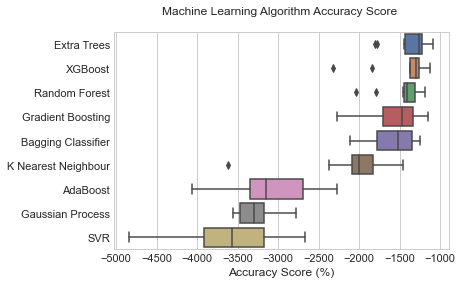

In [185]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

In [186]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

In [187]:
xgb.feature_importances_

array([0.37737954, 0.09506185, 0.3463164 , 0.0237591 , 0.03415502,
       0.03048387, 0.03679058, 0.03346181, 0.02259181], dtype=float32)

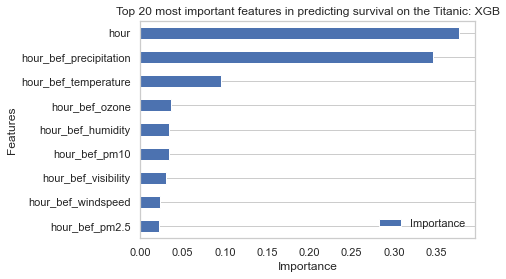

In [188]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':temp.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

# 그래프 제목
title = 'Top 20 most important features in predicting survival on the Titanic: XGB'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [189]:
importances

,Feature,gbr importance,xgb importance,ran importance,ext importance,ada importance,Average
0,hour,0.660196,0.370509,0.589752,0.503940,0.261575,0.477195
1,hour_bef_temperature,0.206299,0.087804,0.178390,0.196185,0.269741,0.187684
2,hour_bef_precipitation,0.026786,0.373968,0.024349,0.032234,0.038612,0.099190
3,hour_bef_ozone,0.027365,0.038468,0.042796,0.052766,0.128557,0.057990
4,hour_bef_humidity,0.015732,0.030463,0.039494,0.062238,0.110259,0.051637
5,hour_bef_visibility,0.025558,0.028226,0.036778,0.041130,0.058406,0.038020
6,hour_bef_pm10,0.018513,0.027884,0.034915,0.034419,0.045199,0.032186
7,hour_bef_windspeed,0.008127,0.019074,0.028070,0.048592,0.047876,0.030348
8,hour_bef_pm2.5,0.011423,0.023602,0.025455,0.028495,0.039775,0.025750


## Hyperparameter tunning

In [190]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVR(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


-2288.1976694533837
{'C': 50, 'gamma': 0.1}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished


In [191]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.5s finished


-1558.6658501295126
{'learning_rate': 0.01, 'n_estimators': 2000}


In [192]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of 100 | elapsed:    6.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.1s finished


-3623.5413147860477
{'C': 2.7825594022071245, 'penalty': 'l2'}


### XGBoost steps

In [193]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBRegressor(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 133 out of 180 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.2s finished


-1449.5645630474562
{'learning_rate': 0.05, 'n_estimators': 500}


In [194]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, n_estimators=250), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


KeyboardInterrupt: 

In [ ]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, n_estimators=250, max_depth=7, 
                                          min_child_weight=2), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  25 | elapsed:    0.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished


-1415.076069272493
{'gamma': 0.4}


In [ ]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, n_estimators=250, max_depth=7, 
                                          min_child_weight=2, gamma=0.4), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.0s


-1394.1533407689908
{'colsample_bytree': 0.9, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    5.9s finished


In [ ]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, n_estimators=250, max_depth=7, 
                                          min_child_weight=2, gamma=0.4, subsample=0.8, colsample_bytree=0.9), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  25 | elapsed:    0.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished


-1378.3422462681374
{'reg_alpha': 0.1}


In [ ]:
n_restarts_optimizer = [0, 1, 2, 3]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer}

gd=GridSearchCV(estimator = GaussianProcessRegressor(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


-3353.133749647469
{'n_restarts_optimizer': 0}


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


In [ ]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostRegressor(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  93 out of 140 | elapsed:    5.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.4s finished


-2168.8474895387326
{'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsRegressor(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


-2078.092685105304
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 253 out of 300 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


In [ ]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestRegressor(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   13.0s finished


-1519.7335973231395
{'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesRegressor(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 753 out of 800 | elapsed:    5.2s remaining:    0.2s


-1451.1013919637803
{'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 75}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    5.7s finished


In [ ]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingRegressor(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring=scoring, n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:   15.6s finished


-1489.6415648828438
{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}


In [195]:
# 튜닝 모델 시작
# sample을 split하는 것은 전체데이터 80%를 트레인셋에 20%는 테스트셋에 줌  
svr = SVR(C=50, gamma=0.1)
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=2000)
xgb = XGBRegressor(learning_rate=0.1, n_estimators=250, max_depth=7, 
        min_child_weight=2, gamma=0.4, subsample=0.8, colsample_bytree=0.9, reg_alpha=0.1)
gpr = GaussianProcessRegressor(n_restarts_optimizer=0)
ada = AdaBoostRegressor(learning_rate=0.1, n_estimators=100)
knn = KNeighborsRegressor(algorithm='auto', leaf_size=1, n_neighbors=5, weights='distance')
ran = RandomForestRegressor(max_depth=None, max_features=0.8, min_samples_leaf=2,
        min_samples_split=6, n_estimators=200)
ext = ExtraTreesRegressor(max_depth=None, max_features=0.8, min_samples_leaf=2,
        min_samples_split=2, n_estimators=75)
bag = BaggingRegressor(max_features=1.0, max_samples=1.0, n_estimators=200)

# 리스트 준비
models = [ran, knn, xgb, gbr, svr, ext, ada, gpr, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour',
    'XGBoost', 'Gradient Boosting', 'SVR', 'Extra Trees', 'AdaBoost', 
    'Gaussian Process', 'Bagging Classifier']
scores3 = {}

# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring=scoring, cv=10)
    scores3[model_names[ind]] = acc

In [196]:
results = pd.DataFrame(scores3).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)



,0,1,2,3,4,5,6,7,8,9,mean
XGBoost,-1249.632906,-1261.502391,-2048.151543,-1067.226301,-1099.378983,-1276.988526,-1209.512307,-1811.775709,-1355.631809,-1169.738629,-1354.953910
Extra Trees,-1547.279552,-1253.117012,-1963.832314,-1129.153082,-1382.159355,-1222.038626,-1453.926886,-1801.945838,-1278.714743,-1065.816100,-1409.798351
Bagging Classifier,-1435.386871,-1425.228110,-1987.372810,-1361.585126,-1364.494395,-1248.266508,-1454.302403,-1765.470905,-1356.028460,-1225.251136,-1462.338672
Random Forest,-1536.080045,-1381.912901,-2103.466119,-1303.284878,-1481.300985,-1272.968473,-1525.401563,-1790.655752,-1341.764049,-1179.477909,-1491.631268
Gradient Boosting,-1811.567880,-1291.310329,-2100.216558,-1283.498381,-1413.763053,-1206.666976,-1604.142853,-1675.280148,-1373.411181,-1225.572666,-1498.543002
K Nearest Neighbour,-1925.943357,-1709.995707,-3434.632471,-2006.477523,-1950.678646,-1826.134096,-1892.935603,-2257.693553,-1690.304068,-1359.094963,-2005.388999
AdaBoost,-2590.989479,-1722.764986,-2877.542041,-1915.830372,-2246.391569,-1729.228717,-2378.537209,-2265.078633,-1942.810383,-1579.096689,-2124.827008
SVR,-2538.324045,-1608.158999,-3849.406650,-2422.941163,-2171.238417,-2005.167629,-2420.528584,-2206.710644,-1892.345561,-1491.881874,-2260.670357
Gaussian Process,-3373.628341,-2902.708689,-3502.392658,-3393.670148,-3170.870315,-3227.448185,-3562.349578,-2779.360125,-3517.353567,-3193.324322,-3262.310593


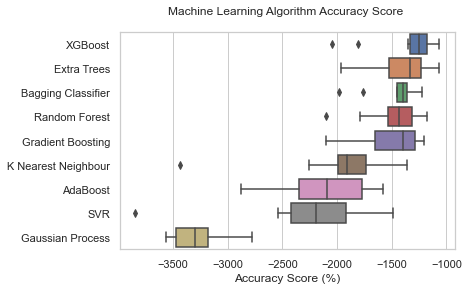

In [197]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

In [199]:
predictions = ext.predict(X_test)
submission = pd.concat([pd.DataFrame(id_test), pd.DataFrame(predictions)], axis='columns')
submission.columns = ["id", "count"]
submission.to_csv('../output/ddareung.csv', header = True, index = False)
submission


,id,count
0,0,66.756794
1,1,219.131222
2,2,52.833566
3,4,80.872687
4,5,1.741830
...,...,...
710,2148,-16.692249
711,2149,-5.065487
712,2165,-2.274399
713,2166,144.500843
